In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 手动构造倾斜数据，变成二分类问题
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores))

# 也就是类似于网格搜索，寻找最佳的超参数
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

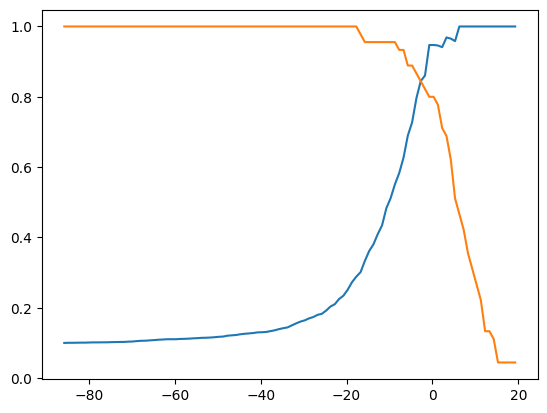

In [18]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

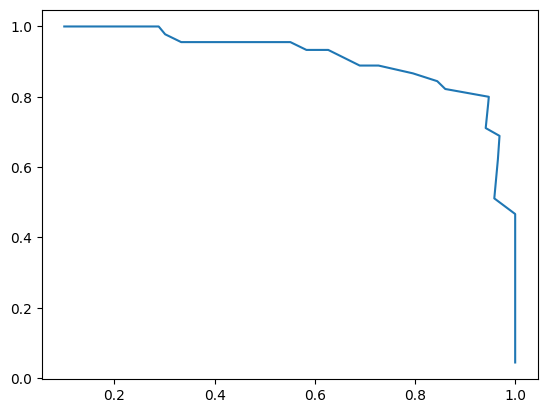

In [19]:
# 随着 precision 增大，recall 会逐渐减小
# 即两个指标是互相制约的
plt.plot(precisions, recalls)
plt.show()

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

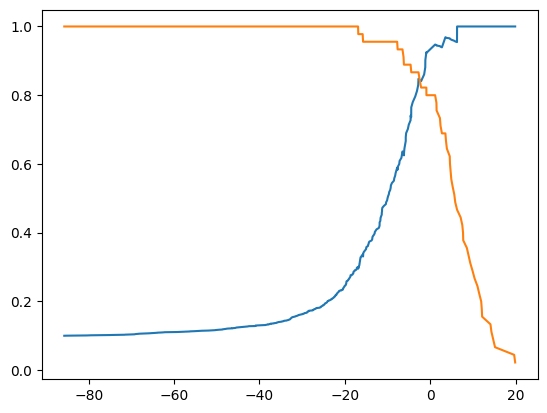

In [26]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

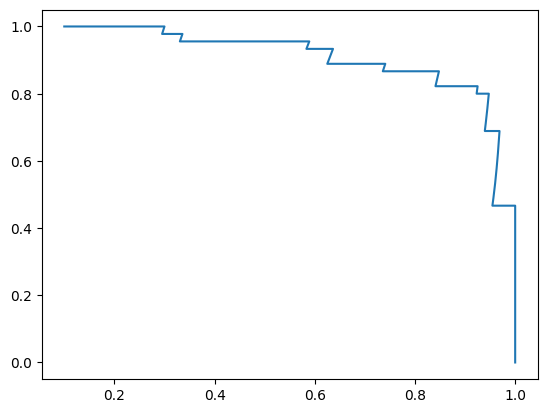

In [27]:
plt.plot(precisions, recalls)
plt.show()